In [132]:
import numpy as np
import matplotlib.pyplot as plt

u_t + 2u_x = x + t
u_x(0) = exp(-t)
u_t(0) = cos(pi*x)

In [133]:
def analic(t, x):
    if(2*t <= x):
        return x*t - 0.5 * t*t + np.cos(np.pi*(2 * t - x))
    else:
        return x*t - 0.5 * t*t + (2 * t - x)*(2 * t - x)/8 + np.exp(x/2 - t)

In [134]:
T = 1.0
X = 1.0
tau = 0.001
h = 0.004

K = int(T / tau)
M = int(X/h)

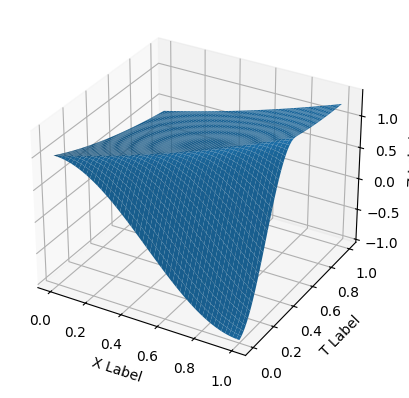

In [135]:
def angle():
    Cell = np.zeros((K, M))
    for i in range(0, M):
        Cell[0][i] = np.cos(np.pi * h * i)

    for i in range(K):
        Cell[i][0] = np.exp(-1 * i * tau)



    for i in range(K-1):
       for j in range(1, M):
           Cell[i+1][j] = Cell[i][j] + tau*(h*j + tau*i - 2*(Cell[i][j] - Cell[i][j-1])/h)



    U = np.zeros((K, M))

    for i in range(K):
        for j in range(M):
            U[i][j] = Cell[i][j]
    return U

U = angle()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0.0, 1.0, M)
t = np.linspace(0.0, 1.0, K)
X, T = np.meshgrid(x, t)


ax.plot_surface(X, T, U)

ax.set_xlabel('X Label')
ax.set_ylabel('T Label')
ax.set_zlabel('Z Label')

plt.show()




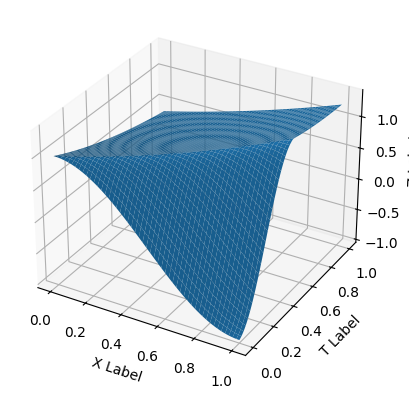

In [136]:
def square():
    Cell = np.zeros((K, M))
    for i in range(0, M):
        Cell[0][i] = np.cos(np.pi * h * i)

    for i in range(K):
        Cell[i][0] = np.exp(-1 * i * tau)



    for i in range(K-1):
       for j in range(1, M):
           Cell[i+1][j] = 2*(tau*(i + 0.5) + h*(j + 0.5) - (-1 * Cell[i+1][j-1] + Cell[i][j] - Cell[i][j-1])/h - (Cell[i+1][j-1] - Cell[i][j-1] - Cell[i][j])/(2*tau))/(2/h + 1/tau)


    U = np.zeros((K, M))

    for i in range(K):
        for j in range(M):
            U[i][j] = Cell[i][j]
    return U

U = square()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0.0, 1.0, M)
t = np.linspace(0.0, 1.0, K)
X, T = np.meshgrid(x, t)


ax.plot_surface(X, T, U)

ax.set_xlabel('X Label')
ax.set_ylabel('T Label')
ax.set_zlabel('Z Label')

plt.show()




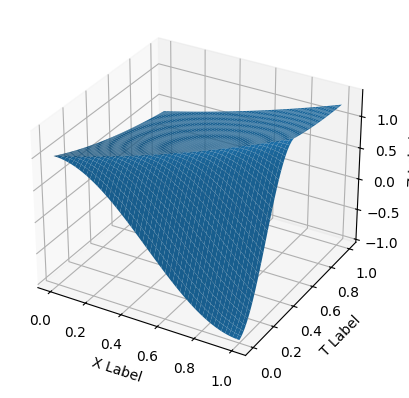

In [137]:
def four_point():
    Cell = np.zeros((K, M))
    for i in range(0, M):
        Cell[0][i] = np.cos(np.pi * h * i)

    for i in range(K):
        Cell[i][0] = np.exp(-1 * i * tau)

    c = 2 * tau / h
    S_deriv_term = (tau**2 / 2.0) * (1.0 - 2.0)
    for i in range(K-1):
       for j in range(1, M-1):
           # Cell[i+1, j] = (1-c**2)*Cell[i,j] + (c**2/2 - c/2)*Cell[i,j+1] \
           #                  + (c**2/2 + c/2)*Cell[i,j-1] + tau * (h*j + tau*i) + S_deriv_term
           Cell[i+1][j] = Cell[i][j] + tau*(tau * i + h * j + 2*tau*(Cell[i][j+1] - 2*Cell[i][j] + Cell[i][j-1])/(h*h) - (Cell[i][j+1] - Cell[i][j-1]) / (h))
       # Cell[i+1][M-1] = (1-c)*Cell[i][M-1] + c*Cell[i][M-2] + tau * (h*(M-1) + tau*i)
       Cell[i+1][M-1] = Cell[i][M-1] + tau*(h*(M-1) + tau*i - 2*(Cell[i][M-1] - Cell[i][M-2])/h)


    U = np.zeros((K, M))

    for i in range(K):
        for j in range(M):
            U[i][j] = Cell[i][j]
    return U

U = four_point()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0.0, 1.0, M)
t = np.linspace(0.0, 1.0, K)
X, T = np.meshgrid(x, t)


ax.plot_surface(X, T, U)

ax.set_xlabel('X Label')
ax.set_ylabel('T Label')
ax.set_zlabel('Z Label')

plt.show()




In [138]:
arr_mismatch = []

In [139]:
steps = np.array([])
mismatch = np.array([])
T = 1.0
X = 1.0
tau = 0.01
h = 0.04
tau_i = 0.01
h_i = 0.04

for st in range(1, 7):
    print(st)
    K = int(T / tau)
    M = int(X/h)
    U = angle()
    error = np.zeros((K, M))

    for i in range(K):
        for j in range(M):
            error[i][j] = np.abs(U[i][j] - analic(i*tau, j*h))

    medium = np.sum(error) / (K*M)
    for i in range(K):
        for j in range(M):
            if error[i][j] > medium:
                error[i][j] = 0.0
    # mismatch = np.append(mismatch, np.log10(np.sum(error) / K*M))
    # steps = np.append(steps, -1*np.log10(tau / tau_i))
    mismatch = np.append(mismatch, np.max(error))
    steps = np.append(steps, tau)
    tau = tau / 2
    h = h / 2


arr_mismatch.append(mismatch)
# plt.figure(figsize=(6, 5))
# plt.plot(steps, mismatch, marker='o', label='Углок')
#
# plt.grid(True, which='both', ls='--')
# plt.legend()
# plt.show()

1
2
3
4
5
6


In [140]:
steps = np.array([])
mismatch = np.array([])
T = 1.0
X = 1.0
tau = 0.01
h = 0.04
tau_i = 0.01
h_i = 0.04

for st in range(1, 7):
    K = int(T / tau)
    M = int(X/h)
    U = square()
    error = np.zeros((K, M))
    for i in range(K):
        for j in range(M):
            error[i][j] = np.abs(U[i][j] - analic(i*tau, j*h))

    medium = np.sum(error) / (K*M)
    for i in range(K):
        for j in range(M):
            if error[i][j] > medium:
                error[i][j] = 0.0

    # mismatch = np.append(mismatch, np.log10(np.sum(error) / K*M))
    # steps = np.append(steps, -1*np.log10(tau / tau_i))
    mismatch = np.append(mismatch, np.max(error)/(2**st))
    steps = np.append(steps, tau)
    tau = tau / 2
    h = h / 2


arr_mismatch.append(mismatch)
# plt.figure(figsize=(6, 5))
# plt.plot(steps, mismatch, marker='o', label='Углок')
#
# plt.grid(True, which='both', ls='--')
# plt.legend()
# plt.show()

In [141]:
steps = np.array([])
mismatch = np.array([])
T = 1.0
X = 1.0
tau = 0.01
h = 0.04
tau_i = 0.01
h_i = 0.04

for st in range(1, 7):
    K = int(T / tau)
    M = int(X/h)
    U = four_point()
    error = np.zeros((K, M))
    for i in range(K):
        for j in range(M):
            error[i][j] = np.abs(U[i][j] - analic(i*tau, j*h))
    medium = np.sum(error) / (K*M)
    for i in range(K):
        for j in range(M):
            if error[i][j] > medium:
                error[i][j] = 0.0
    # mismatch = np.append(mismatch, np.log10(np.sum(error) / K*M))
    # steps = np.append(steps, -1*np.log10(tau / tau_i))
    mismatch = np.append(mismatch, np.max(error)/(2**st))
    steps = np.append(steps, tau)
    tau = tau / 2
    h = h / 2

arr_mismatch.append(mismatch)
# plt.figure(figsize=(6, 5))
# plt.plot(steps, mismatch, marker='o', label='Углок')
#
# plt.grid(True, which='both', ls='--')
# plt.legend()
# plt.show()

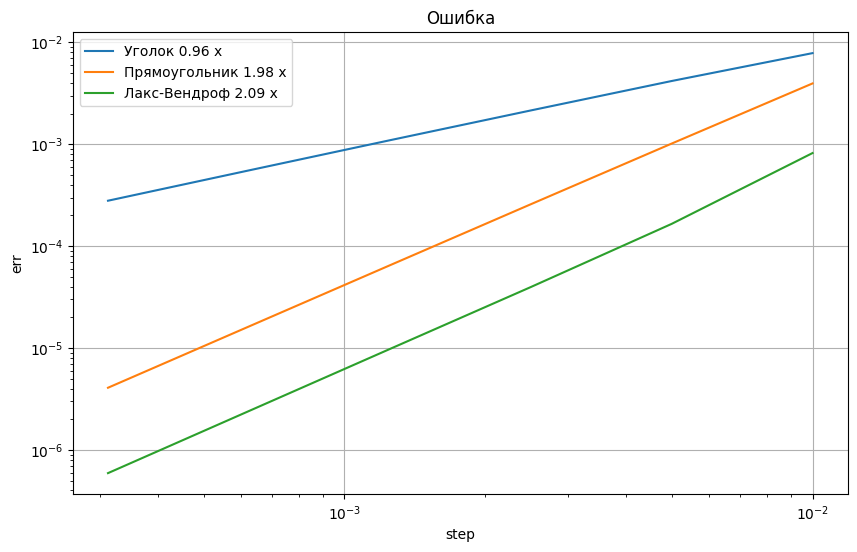

In [142]:
plt.figure(figsize=(10, 6))

au = (np.log(arr_mismatch[0][0]) - np.log(arr_mismatch[0][-1]))/(np.log(steps[0]) - np.log(steps[-1]))
ap = (np.log(arr_mismatch[1][0]) - np.log(arr_mismatch[1][-1]))/(np.log(steps[0]) - np.log(steps[-1]))
al = (np.log(arr_mismatch[2][0]) - np.log(arr_mismatch[2][-1]))/(np.log(steps[0]) - np.log(steps[-1]))


plt.plot(steps, arr_mismatch[0], label='Уголок {0:.2f} x'.format(au))
plt.plot(steps, arr_mismatch[1], label='Прямоугольник {0:.2f} x'.format(ap))
plt.plot(steps, arr_mismatch[2], label='Лакс-Вендроф {0:.2f} x'.format(al))

plt.title('Ошибка')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('step')
plt.ylabel('err')
plt.legend()
plt.grid(True)
plt.show()